# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
## cities

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]['country']# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | swidnik
Processing Record 2 of Set 1 | el daein
City not found. Skipping...
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | north battleford
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | sorong
Processing Record 7 of Set 1 | mococa
Processing Record 8 of Set 1 | raduzhny
Processing Record 9 of Set 1 | klyuchi
Processing Record 10 of Set 1 | susuman
Processing Record 11 of Set 1 | enewetak
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | pimenta bueno
Processing Record 14 of Set 1 | tazacorte
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ilabaya
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | katsuren-haebaru
Processing Record 19 of Set 1 | san luis de la loma
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | uturoa
Processing Record 2

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,swidnik,51.2190,22.6962,22.61,55,20,4.12,PL,1720085790
1,utrik,11.2278,169.8474,27.91,81,76,6.95,MH,1720085793
2,north battleford,52.7834,-108.2847,15.78,100,0,3.09,CA,1720085794
3,bredasdorp,-34.5322,20.0403,15.62,59,4,4.77,ZA,1720085795
4,sorong,-0.8833,131.2500,26.95,79,100,1.04,ID,1720085764


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,swidnik,51.2190,22.6962,22.61,55,20,4.12,PL,1720085790
1,utrik,11.2278,169.8474,27.91,81,76,6.95,MH,1720085793
2,north battleford,52.7834,-108.2847,15.78,100,0,3.09,CA,1720085794
3,bredasdorp,-34.5322,20.0403,15.62,59,4,4.77,ZA,1720085795
4,sorong,-0.8833,131.2500,26.95,79,100,1.04,ID,1720085764


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

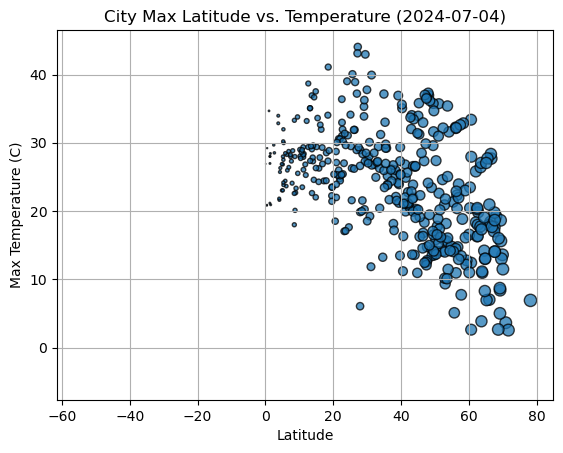

In [32]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Get info from dataframe for graph
lat_info = city_data_df["Lat"]
max_temp_info = city_data_df["Max Temp"]

# CODE from activity - The size of each point on our plot is determined by their x value
## plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

plt.scatter(lat_info, max_temp_info, marker="o", edgecolors="black", s=lat_info, alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
## use strftime to print the date - https://docs.python.org/3/library/time.html#:~:text=time.strftime(format%5B%2C%20t%5D)%C2%B6

plt.title(f"City Max Latitude vs. Temperature ("+ time.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Humidity

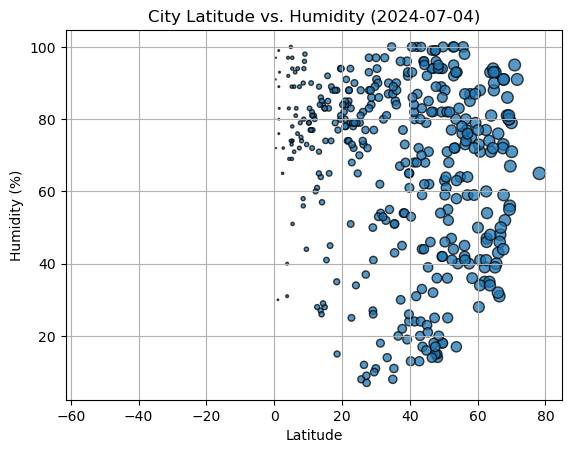

In [34]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Get info from dataframe for graph
lat_info = city_data_df["Lat"]
humidity_info = city_data_df["Humidity"]

plt.scatter(lat_info, humidity_info, marker="o", edgecolors="black", s=lat_info, alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Latitude vs. Humidity ("+ time.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

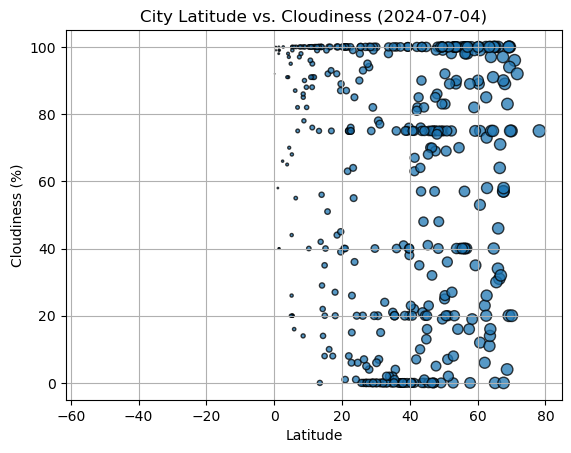

In [36]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Get info from dataframe for graph
lat_info = city_data_df["Lat"]
cloudiness_info = city_data_df["Cloudiness"]

plt.scatter(lat_info, cloudiness_info, marker="o", edgecolors="black", s=lat_info, alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Latitude vs. Cloudiness ("+ time.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

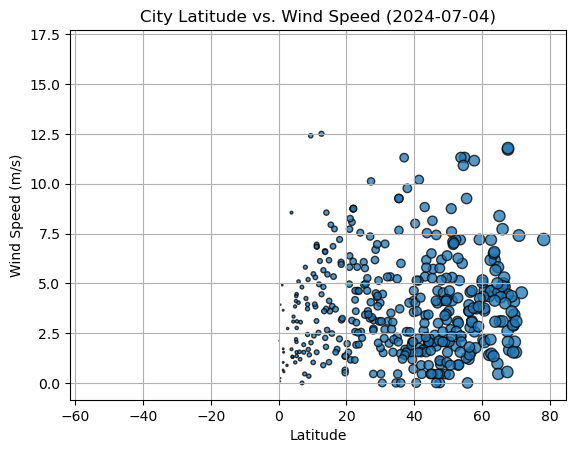

In [37]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Get info from dataframe for graph
lat_info = city_data_df["Lat"]
wind_speed_info = city_data_df["Wind Speed"]

plt.scatter(lat_info, wind_speed_info, marker="o", edgecolors="black", s=lat_info, alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Latitude vs. Wind Speed ("+ time.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.grid()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

## create regression plots function - input x and 
def create_regression_plots(x_values, y_values, x_point, y_point):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_point,y_point),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel (y_values.name)
    plt.title("Latitude vs "+ y_values.name)
    print(f"The r^2 value is: {rvalue**2}")
    plt.show()


In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,swidnik,51.2190,22.6962,22.61,55,20,4.12,PL,1720085790
1,utrik,11.2278,169.8474,27.91,81,76,6.95,MH,1720085793
2,north battleford,52.7834,-108.2847,15.78,100,0,3.09,CA,1720085794
6,raduzhny,62.0961,77.4750,25.80,35,6,1.40,RU,1720085799
7,klyuchi,52.2667,79.1667,24.60,47,98,1.84,RU,1720085800


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,15.62,59,4,4.77,ZA,1720085795
4,sorong,-0.8833,131.2500,26.95,79,100,1.04,ID,1720085764
5,mococa,-21.4678,-47.0047,14.12,68,0,2.10,BR,1720085797
11,pimenta bueno,-11.6725,-61.1936,21.62,66,39,0.77,BR,1720085805
13,port-aux-francais,-49.3500,70.2167,1.22,59,38,3.79,TF,1720085790


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.24721243103836443


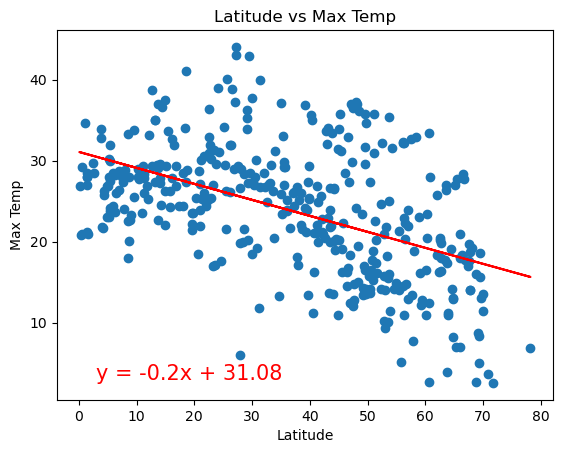

In [63]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

## Get X axis and Y axis values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

## call create_regression_plots function to create the regression plot

create_regression_plots(x_values, y_values, 3, 3)


The r^2 value is: 0.6947108377781192


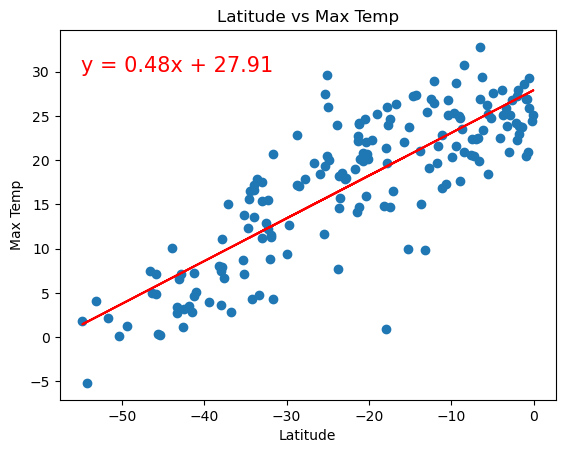

In [70]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

## Get X axis and Y axis values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

## call create_regression_plots function to create the regression plot

create_regression_plots(x_values, y_values, -55, 30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.025775298310547916


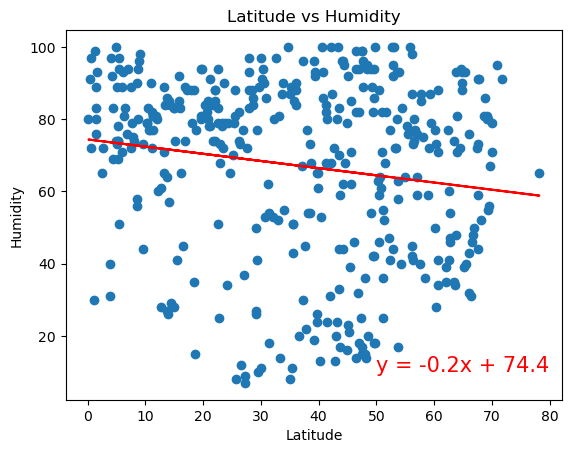

In [71]:
# Northern Hemisphere
# YOUR CODE HERE

## Get X axis and Y axis values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

## call create_regression_plots function to create the regression plot

create_regression_plots(x_values, y_values, 50, 10)


The r^2 value is: 0.006064997341900196


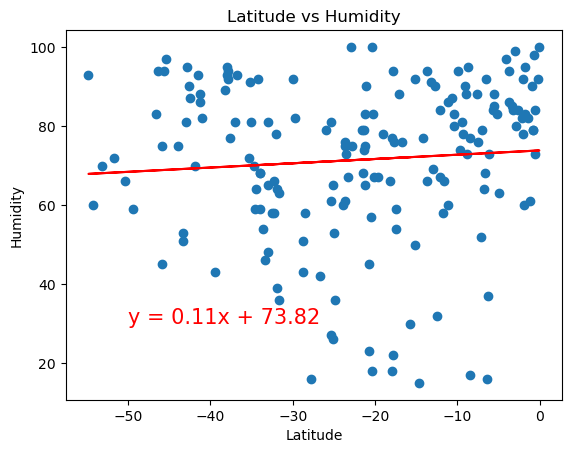

In [73]:
# Southern Hemisphere
# YOUR CODE HERE

## Get X axis and Y axis values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

## call create_regression_plots function to create the regression plot

create_regression_plots(x_values, y_values, -50, 30)


**Discussion about the linear relationship:** 
Northern Hemisphere
 - looks non linear correlation
 - r value is 0.02

Southern Hemisphere
 - no correlation
 - r value is 0.006

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.00673069423475267


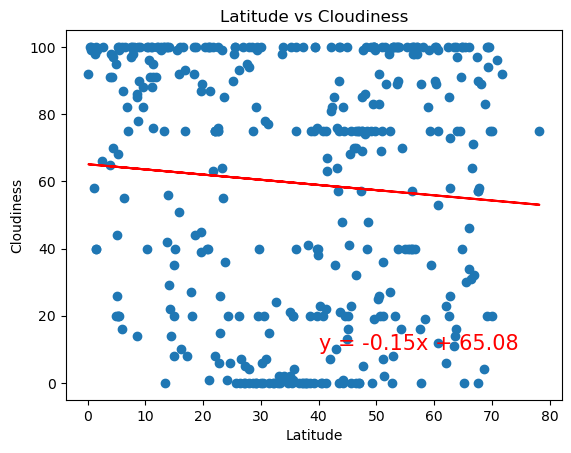

In [74]:
# Northern Hemisphere
# YOUR CODE HERE

## Get X axis and Y axis values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

## call create_regression_plots function to create the regression plot

create_regression_plots(x_values, y_values, 40, 10)

The r^2 value is: 0.043988340531163635


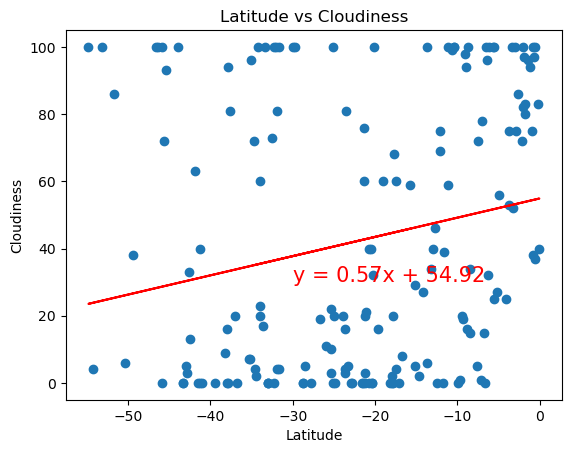

In [75]:
# Southern Hemisphere
# YOUR CODE HERE

## Get X axis and Y axis values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

## call create_regression_plots function to create the regression plot

create_regression_plots(x_values, y_values, -30, 30)

**Discussion about the linear relationship:** 
Northern Hemisphere
 - no correlation
 - r value is 0.006

Southern Hemisphere
 - very weak positive relationship
 - r value is 0.04

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.005127154346693151


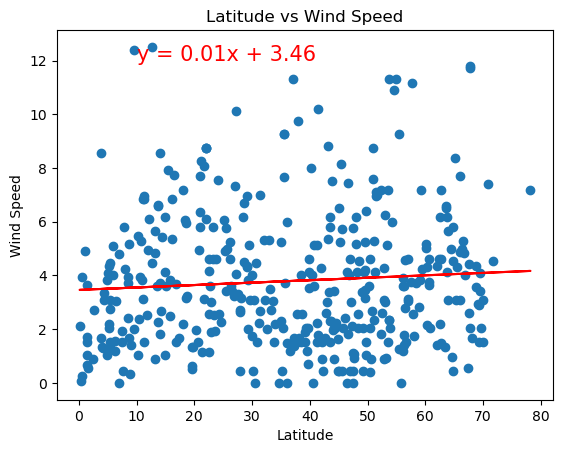

In [76]:
# Northern Hemisphere
# YOUR CODE HERE

## Get X axis and Y axis values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

## call create_regression_plots function to create the regression plot

create_regression_plots(x_values, y_values, 10, 12)

The r^2 value is: 0.05374964326584009


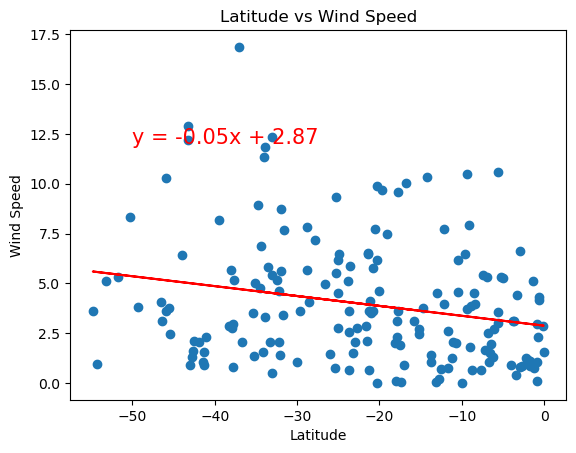

In [78]:
# Southern Hemisphere
# YOUR CODE HERE

## Get X axis and Y axis values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

## call create_regression_plots function to create the regression plot

create_regression_plots(x_values, y_values, -50, 12)

**Discussion about the linear relationship:** 
Northern Hemisphere
 - very weak positive relationship
 - r value is 0.005

Southern Hemisphere
 - very weak positive relationship
 - r value is 0.05